# 1. Import Library

In [87]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 資料預處理

In [88]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [89]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [90]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [91]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [92]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [93]:
model = Sequential()

In [94]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))



In [95]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

# 訓練模型

In [96]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [97]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 2s - loss: 0.5081 - accuracy: 0.8444 - val_loss: 0.1053 - val_accuracy: 0.9679
Epoch 2/20
160/160 - 2s - loss: 0.1432 - accuracy: 0.9569 - val_loss: 0.0743 - val_accuracy: 0.9778
Epoch 3/20
160/160 - 2s - loss: 0.1036 - accuracy: 0.9689 - val_loss: 0.0618 - val_accuracy: 0.9803
Epoch 4/20
160/160 - 2s - loss: 0.0822 - accuracy: 0.9751 - val_loss: 0.0475 - val_accuracy: 0.9853
Epoch 5/20
160/160 - 2s - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 6/20
160/160 - 2s - loss: 0.0615 - accuracy: 0.9809 - val_loss: 0.0413 - val_accuracy: 0.9868
Epoch 7/20
160/160 - 2s - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 8/20
160/160 - 2s - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 9/20
160/160 - 2s - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0353 - val_accuracy: 0.9901
Epoch 10/20
160/160 - 2s - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0342 - val_accuracy: 0.9902

In [98]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [99]:
#show_train_history('acc','val_acc')

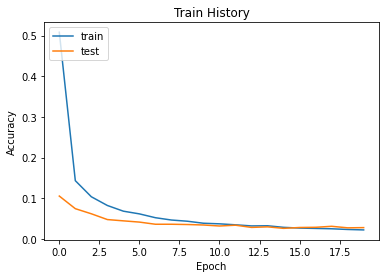

In [100]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [109]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9935


0.9934999942779541

# 預測結果

In [110]:
prediction=model.predict_classes(x_Test4D_normalize)

In [111]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [112]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

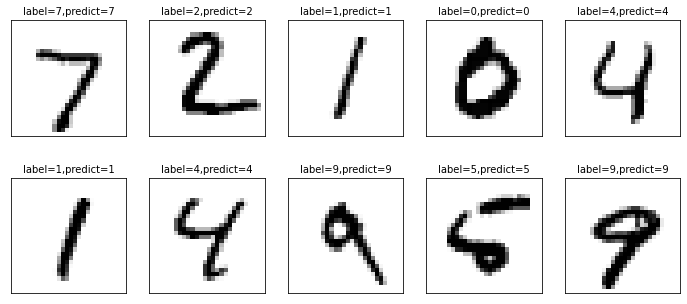

In [113]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [114]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1133,1,0,0,0,0,0,1,0
2,1,1,1026,0,0,0,0,3,1,0
3,0,0,0,1004,0,4,0,1,1,0
4,0,0,0,0,974,0,0,0,2,6
5,1,0,0,4,0,886,1,0,0,0
6,7,2,0,0,1,2,945,0,1,0
7,0,1,3,0,0,0,0,1021,1,2
8,2,0,1,1,0,0,0,1,967,2


In [115]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [116]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2035,5,3
2597,5,3
5937,5,3
